# Working With Real Data - GE and Ford

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<h3> Read Data</h3><br>
The data to be retrieved is defined as a dictionary. We are keen to retrieve the data for Ford (F) and GE (F)

<h3>API - broken</h3>
Since August 1st, 2018, the API no longer returns any data.  We therefore load the prices from a spreadsheet

We can read directly from a spread sheet using pandas's function `read_excel` and passing it the location of the file we want to read

In [12]:
# Read GE and Ford data from xlsx file, use the first column as index
df_GE = pd.read_excel('../../Data/GE.xlsx',index_col=0)
df_F = pd.read_excel('../../Data/FORD.xlsx', index_col=0)

We can print the first rows of a pandas dataframe using the `head` method and the last ones using `tail`

In [13]:
print(df_F.tail())

               F
2018-09-24  9.59
2018-09-25  9.39
2018-09-26  9.27
2018-09-27  9.23
2018-09-28  9.25


In [15]:
# we use "loc" to select a row using its index, in this case the indexes are dates
# show the value for the date '2018-09-25'
df_F.loc['2018-09-25']

F    9.39
Name: 2018-09-25 00:00:00, dtype: float64

<h3> Create one datastructure </h3>
Consolidate the Data of Ford and GE into one single DataFrame

We use the function `concatenate` to join the two dataframes using the idex as reference point

In [19]:
# Concatenate receives a list of dataframes to join, and the axis to join them
# axis 1 = join columns, axis 0 = join rows
df = pd.concat([df_F,df_GE],axis=1)
df.tail()

,F,GE
2018-09-24,9.59,11.74
2018-09-25,9.39,11.27
2018-09-26,9.27,11.39
2018-09-27,9.23,11.53
2018-09-28,9.25,11.29


<b>Task:</b> Remove all the entries where there are missing values.

When we join the two dataframes using the index, some values of one dataframe may not appear on the other (eg. missing dates) so `concatenate` will fill this missing values with **NaN** i.e. "not a number"

In [21]:
df.head()

,F,GE
2007-10-23,NaN,40.48
2007-10-24,NaN,40.23
2007-10-25,NaN,40.16
2007-10-26,NaN,40.38
2007-10-29,NaN,40.56


We can use `dropna` to delete all this values. This will delete the entire row.

In [22]:
# Drop any NaN values and save the new dataframe in place of the oldone
df.dropna(how='any',inplace=True)

<b>Task:</b> What values do you have for Jan8th, 2018 ?

In [23]:
# select by index using "Loc" but this time we have another colum so we specify the ":" to be shown all columns
df.loc['2018-01-08',:]

F     13.15
GE    18.28
Name: 2018-01-08 00:00:00, dtype: float64

Calculate the difference between the return of GE and F

In [26]:
# Use pct_change to calculate the return using a lag of 1 period (argument "periods")
df_ret = df.pct_change(periods=1)
df_ret.head()

,F,GE
2010-10-01,NaN,NaN
2010-10-04,0.047308,-0.015892
2010-10-05,0.013240,0.025466
2010-10-06,0.017679,0.023622
2010-10-07,0.006042,0.008876


Using pandas we can compute some basic mathematical operations between columns

In [35]:
# Return diference between GE and Ford in each period of time
df_ret['Diff']= df_ret['GE']-df_ret['F']
# We use the method "apply" to perform an operation to each element in a column
# this function receives a function, in this case we use a lambda function to compute the absolout value
df_ret['Diff']=df_ret['Diff'].apply(lambda x : np.abs(x))
# Print the first 5 values
df_ret.head()

,F,GE,Diff
2010-10-01,NaN,NaN,NaN
2010-10-04,0.047308,-0.015892,0.063201
2010-10-05,0.013240,0.025466,0.012226
2010-10-06,0.017679,0.023622,0.005943
2010-10-07,0.006042,0.008876,0.002833


<h3>Graph</h3>
DataFrames have their own build-in functions to plot their data

We can simply use the method `plot` to plot the data of each column using the index as the x-axis and the values as y-axis. 
Each column will then be a separate element in the plot

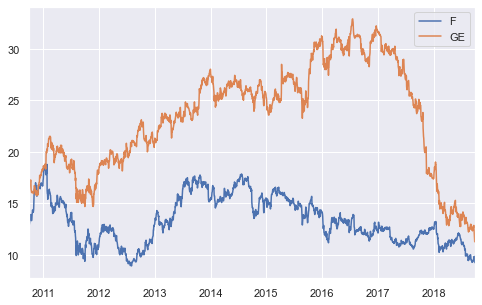

In [36]:
# Use the plot method with argument "figsize" to define a figure of size (8,5)
df.plot(figsize=(8,5));

We can also plot each column in a separate plot  in the same figure with the help of matplotlib.
For this we will make use of `subplots`

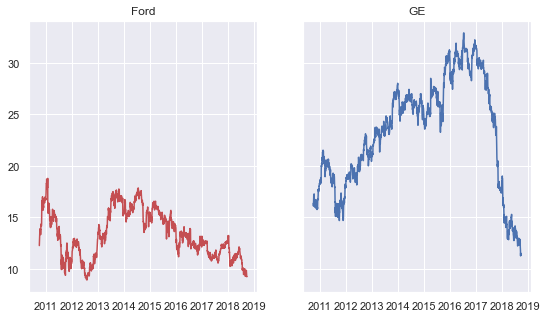

In [37]:
# The first argument of subplots defines the number of vertical plots, the sencond one the number of horizontal plots,
# then we will define the size of the figure and set "sharey" to True to force the plots to share the y axis
fig , ax = plt.subplots(1,2,figsize=(9,5),sharey=True)
# The ax have represent each plot
# We will plot the Ford data on the first plot and on the second one the GE data
ax[0].plot(df.index,df['F'],'r',label='F')
ax[1].plot(df.index,df['GE'],'b',label='GE')
# Define the title of each plot
ax[0].set_title('Ford')
ax[1].set_title('GE');